# Partial Sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Things to be done here

1) write algorithm for agent3, agent4 <br>
2) if object_matrix is knowledge base, then lets rename it to knowledge base to avoid confusion and have unambiguous variable names.<br>
3) Import A* code into this file.

## Things done here

1) declared the set of global variables required
2) renamed object_matrix to knowledge_base

<class 'numpy.matrix'>
A*: 
There is no path available to goal Node


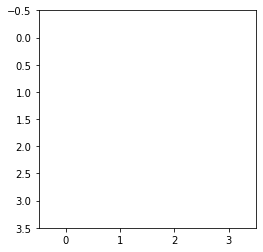

shortest path A*:  []


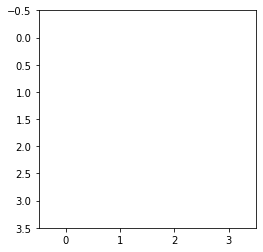

Actual Gridworld


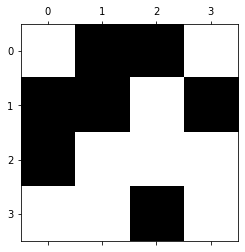

In [1]:
from ipynb.fs.full.a_star import *
import numpy as np
from ipynb.fs.full.agent_6 import *
from scipy.spatial.distance import cityblock
import random
import sys

In [2]:
maze_size = 4
probability = 0.3

global agent_gridworld
global helper_matrix
global full_grid_world_matrix
global visited_list
global number_of_bumps
global knowledge_base
global probability_matrix
global terrain_matrix
global final_path
global goal_reached

goal_reached = False
visited_list = []
final_path = []
agent_gridworld = np.matrix(np.zeros((maze_size, maze_size)))
confirmed_path = [] #path that agent 3 has recognized
helper_matrix = np.full((maze_size, maze_size), 0)
probability_matrix = np.full((maze_size, maze_size), 0.0)
terrain_matrix = np.full((maze_size, maze_size), 0)
full_grid_world_matrix = np.full((maze_size, maze_size), 0)

# knowledge_base is used to store the inference/ knowledge base of objects(nodes) with it's respective indices
knowledge_base = np.array([agent_6(int(item/maze_size),item%maze_size,maze_size) for item in range(maze_size * maze_size)]).reshape(maze_size, maze_size)


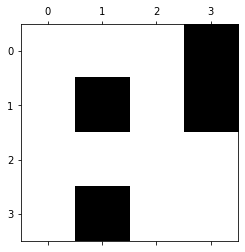

In [3]:
# full_grid_world_matrix = populateMatrix(maze_size, probability)

#### Use either the above line in the block or the below set of lines of code to get the full grid world

# full_grid_world_matrix = [[0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
#         [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
#         [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
#         [0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
#         [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
#         [1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]]

full_grid_world_matrix = [[0, 0, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 0, 0],
        [0, 1, 0, 0]]

full_grid_world_matrix = np.matrix(full_grid_world_matrix)
plt.spy(full_grid_world_matrix)

In [4]:
def blockedNeighbors(n, row, col):
    
    global full_grid_world_matrix
    direction_list = [[-1, 0], [1, 0], [1, 1], [1, -1], [-1, -1], [-1, 1], [0, 1], [0, -1]]
    
    count = 0
    for direction in direction_list:
        row_new = row + direction[0]
        col_new = col + direction[1]
        if (row_new>=0 and row_new<=(n-1)) and (col_new>=0 and col_new<=(n-1)):
            if full_grid_world_matrix[row_new, col_new] == 1:
                count += 1
    return count

def initialize_helper_matrix(n):
    dir = [[-1, 0], [1, 0], [1, 1], [1, -1], [-1, -1], [-1, 1], [0, 1], [0, -1]]
    global helper_matrix
    for x in range(n):
        for y in range(n):
            count = blockedNeighbors(n, x, y)
            helper_matrix[x][y] = count


In [5]:
def initialize_terrain_matrix(maze_size):
    n = 10
    p = 1

    # generates number between 0-2
    np_array = np.random.randint(3, size=100)

    block = lambda x: 2 if x>p else (1 if x<p else 0)
    vectorized_block = np.vectorize(block)

    np_array = vectorized_block(np_array).reshape(n,n)
    terrain_matrix = np.asmatrix(np_array)

    return terrain_matrix

In [6]:
def initialize_probability_matrix(maze_size):
    initial_probability = 1/(maze_size * maze_size)
    
    for row in range(len(knowledge_base)):
        for col in range(len(knowledge_base)):
            probability_matrix[row][col] = float(initial_probability)

In [7]:
def initialize_all_matrices(maze_size):
    global knowledge_base
    initialize_helper_matrix(maze_size)
    # initializing getNx
    for i in range(maze_size):
        for j in range(maze_size):
            knowledge_base[i][j].Nx = getNx(i, j, maze_size)
            knowledge_base[i][j].Cx = helper_matrix[i][j]
            
    terrain_matrix = initialize_terrain_matrix(maze_size)
    probability_matrix = initialize_probability_matrix(maze_size)

In [8]:
def get_agent_gridworld_from_knowledge_base(object_matrix):
    global maze_size

    agent_gridworld = np.zeros((maze_size, maze_size))
    for i in range(maze_size):
        for j in range(maze_size):
            if object_matrix.item((i,j)).blocked == 1:
                agent_gridworld[i][j] = 1
    return agent_gridworld

In [9]:
def getNx(row, col, n):
    if (row ==0  and col == 0) or (row == 0 and col == n-1) or (row==n-1 and col==0) or (row ==n-1 and col==n-1):
        return 3
    
    elif row == 0 or col == 0 or col == n-1 or row == n-1:
        return 5
    else:
        return 8

In [10]:
def get_neighbors(row, col, n):
    #top left node
    if (row ==0  and col == 0) :
        return [(row+1, col), (row, col+1), (row+1, col+1)]
    
    #top right node
    elif (row == 0 and col == n-1):
        return [(row, col-1), (row+1, col), (row+1, col-1)]
    
    #bottom left node
    elif (row==n-1 and col==0):
        return [(row-1, col), (row, col+1), (row-1, col+1)]
    
    #bottom right node
    elif (row ==n-1 and col==n-1):
        return [(row-1, col-1), (row, col-1), (row-1, col-1)]

    # top edge nodes
    elif row == 0:
        return [(row, col-1), (row+1, col-1), (row+1, col), (row+1, col+1), (row, col+1)]
    
    # bottom edge nodes
    elif row == n-1:
        return [(row, col-1), (row-1, col-1), (row-1, col), (row-1, col+1), (row, col+1)]
    
    # left edge nodes
    elif col == 0:
        return [(row-1, col), (row-1, col+1), (row, col+1), (row+1, col+1), (row+1, col)]
    
    # right edge nodes
    elif col == n-1:
        return [(row-1, col), (row-1, col-1), (row, col-1), (row+1, col-1), (row+1, col)]
    else:
        return [(row-1, col-1), (row, col-1), (row+1, col-1), (row+1, col), (row+1, col+1),\
               (row, col+1), (row-1, col+1), (row-1, col)]
    


# Code for Agent 6 goes here

In [11]:
def agent6(maze_size, source): # using this name for the lack of a better name. please change.
    global visited_list
    global number_of_bumps
    global knowledge_base
    global agent_gridworld
    global full_grid_world_matrix
    global confirmed_path
    global infered_list
    global expression_list
    global number_of_bumps
    global confirmed_path

    _,_,_,path = astar(source,agent_gridworld)
    path = path[::-1]
    print('path', path)
    goal_reached = False

    if path == []:
        return visited_list, number_of_bumps, infered_list, goal_reached

    for node in path:
        row = node[0]
        column = node[1]
        knowledge_base[row][column].blocked = helper_matrix[row][col]

In [12]:
def normalize_probabilities(node, updated_probability_of_current_node):
    sum_of_probabilities = 0
    for row in range(maze_size):
        for col in range(maze_size):
            if row == node[0] and col == node[1]:
                continue
            else:
                sum_of_probabilities += probability_matrix[row][col]
#     print("sum_of_probabilities", sum_of_probabilities)
    Total_probability = updated_probability_of_current_node + sum_of_probabilities
#     print('Total_probability', Total_probability)
    
    updated_probability_of_current_node = updated_probability_of_current_node/Total_probability

    for row in range(maze_size):
        for col in range(maze_size):
            if row == node[0] and col == node[1]:
                probability_matrix[row][col] = updated_probability_of_current_node
            else:
                probability_matrix[row][col] = probability_matrix[row][col] / Total_probability
    
    # verifying total probability = 1
    sum_of_probabilities = 0
    for row in range(maze_size):
        for col in range(maze_size):
            sum_of_probabilities += probability_matrix[row][col]
#     print("sum_of_probabilities", sum_of_probabilities)

In [13]:
def node_with_highest_probability(probability_matrix, current_node = (0,0)):
    identical_probabilities = np.all(probability_matrix == probability_matrix[0])
    
    max_probability = probability_matrix.max()
#     print('max_probability', max_probability)

    condition = probability_matrix == probability_matrix.max()
    occurrence_of_max_probabilities = np.count_nonzero(condition)

    if occurrence_of_max_probabilities > 1:
        previous_manhattan_distance = 99999

        occurences = list(np.where(probability_matrix == max_probability))
        number_of_occurrences = len(occurences[0])
        for index in range(number_of_occurrences):
            _row = occurences[0][index]
            _col = occurences[1][index]
            
            target_node = [(_row, _col)]
#             print('current_node', current_node)
#             print("target_node", target_node)
            # find manhattan distance
            current_manhattan_distance = cityblock([current_node], target_node)
            # code for finding manhattan distance between current node and the node in loop
            if current_manhattan_distance < previous_manhattan_distance and target_node != [current_node]:
                previous_manhattan_distance = current_manhattan_distance
                node_to_return = target_node
    else:
        max_node = list(np.where(probability_matrix == max_probability))
        row = max_node[0][0]
        col = max_node[1][0]
        node_to_return = (row, col)
    return node_to_return

In [14]:
def agent_6(source):
    global final_path
    global goal_reached

    terrain_matrix = initialize_terrain_matrix(10)
    terrain_list = ['flat', 'hilly', 'forest']
    false_negative_rates = [0.2, 0.5, 0.8]
    
    terrain_matrix = [[1, 0, 0, 1, 1, 0, 2, 2, 0, 2],
        [0, 1, 2, 2, 2, 2, 2, 0, 1, 2],
        [0, 2, 2, 2, 2, 2, 1, 2, 1, 0],
        [1, 2, 2, 1, 2, 1, 1, 2, 0, 0],
        [1, 1, 2, 0, 1, 1, 0, 0, 0, 2],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
        [1, 0, 2, 2, 1, 0, 2, 2, 2, 0],
        [1, 0, 1, 0, 0, 1, 1, 1, 2, 1],
        [1, 2, 2, 0, 2, 2, 0, 0, 1, 2],
        [2, 2, 1, 1, 0, 0, 0, 0, 0, 0]]
    terrain_matrix = np.matrix(terrain_matrix)
    
    
#     path = [(0,0), (0,1)]
    
    while goal_reached == False:
        highest_probability_node = node_with_highest_probability(probability_matrix, source)[0]
        print("source", source)
        print("temporary target", highest_probability_node)
        path = astar(source + (0,), agent_gridworld, highest_probability_node)[0]
        print('path', path)
        for node in path:
            print('node', node)
            row = node[0]
            col = node[1]

            terrain_index = terrain_matrix[node]
            terrain_type = terrain_list[terrain_index]
            false_negative_rate = false_negative_rates[terrain_index]

            print(terrain_type)

            if full_grid_world_matrix[node] == 0:
                print('free')
                if node not in final_path:
                    final_path.append(node)
    #             previous_probability_of_current_node = probability_matrix[row][col]
                updated_probability_of_current_node = false_negative_rate * probability_matrix[row][col]
                print('previous_probability_of_current_node', probability_matrix[row][col])
                print("updated_probability_of_current_node", updated_probability_of_current_node)

                normalize_probabilities(node, updated_probability_of_current_node)
    #             print(probability_matrix)
            elif full_grid_world_matrix[node] == 1:
                probability_matrix[row][col] = 0

                normalize_probabilities(node, updated_probability_of_current_node)
                agent_gridworld.itemset((row, col), 1)
                source = final_path[-1] #last visited node in the path
                agent_6(source)

                print('blocked')
            elif full_grid_world_matrix[node] == 999:
                goal_reached = True
                final_path.append(node)
                print("Target found")
                return final_path

# Main function

In [15]:
if __name__ == "__main__":
    initialize_all_matrices(maze_size)
    
    # initializing a random target
    target_row = random.randint(0, maze_size-1)
    target_col = random.randint(0, maze_size-1)
#     print("Actual target", (target_row, target_col))
    #setting target
#     full_grid_world_matrix.itemset((target_row, target_col), 99)
    full_grid_world_matrix.itemset((3, 3), 999)
    print("Actual target", (3, 3))
    
    
    # initialize random source
    source_row = random.randint(0, maze_size-1)
    source_col = random.randint(0, maze_size-1)
#     full_grid_world_matrix.itemset((source_row, source_col), 0)
    
#     agent_6((source_row, source_col))
    full_grid_world_matrix.itemset((0, 0), 0)
    path = agent_6((0, 0))
    print("Probabilistic path that the agent traversed: ", path)

Actual target (3, 3)
source (0, 0)
temporary target (0, 1)
Reached Goal!!!!!!!!!!!!!!!!!!!!!!!
path [(0, 0), (1, 0), (0, 1)]
node (0, 0)
hilly
free
previous_probability_of_current_node 0.0625
updated_probability_of_current_node 0.03125
node (1, 0)
flat
free
previous_probability_of_current_node 0.06451612903225806
updated_probability_of_current_node 0.012903225806451613
node (0, 1)
flat
free
previous_probability_of_current_node 0.06802721088435376
updated_probability_of_current_node 0.013605442176870753
source (0, 0)
temporary target (0, 2)
Reached Goal!!!!!!!!!!!!!!!!!!!!!!!
path [(0, 0), (1, 0), (0, 1), (2, 0), (1, 1), (3, 0), (2, 1), (3, 1), (3, 2), (3, 3), (2, 3), (1, 3), (2, 2), (1, 2), (0, 3), (0, 2)]
node (0, 0)
hilly
free
previous_probability_of_current_node 0.03597122302158272
updated_probability_of_current_node 0.01798561151079136
node (1, 0)
flat
free
previous_probability_of_current_node 0.01465201465201465
updated_probability_of_current_node 0.0029304029304029304
node (0, 1)

Test

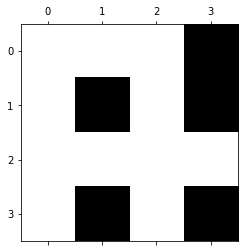

In [16]:
full_grid_world_matrix
plt.spy(full_grid_world_matrix)

In [17]:
full_grid_world_matrix

matrix([[  0,   0,   0,   1],
        [  0,   1,   0,   1],
        [  0,   0,   0,   0],
        [  0,   1,   0, 999]])